In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# DEFININDO AS FUNÇÕES 
def V(x):
    return 6*( 1/2 - 1/(np.cosh(x)**2))
def F(x,E):
    return ( E - V(x))
def c_(x,h,E):
    return 1 + 2*F(x,E)*h**2/12
def c_i(x,h,E):
    return 2 - 5*F(x,E)*h**2/6

def turning_point(E,xi,hh):
    while(hh>0.000001):
        x  = xi;         f  = F(x,E)
        x  = xi + hh;    ff = F(x,E)
        if(f*ff<0):
            hh = hh/2
        else:
            xi= x  
    return x

def Psi_E(E ,h ,phi_i ,phi_0 ):
    x_turning = turning_point(E,xi=0,hh=10) # Ponto de retorno
    xi        = -10  
    max1      = 0     
    Phi_f     = []
    x_f       = []
    while ( xi <= x_turning +h ):
        PHI = ( c_i( xi + h, h, E)*phi_i - c_( xi,h,E)*phi_0 )/c_( xi+2*h, h, E)
        if(abs(PHI)>max1):
            max1 = PHI    
        
        phi_0 = phi_i
        phi_i = PHI
        
        
        x_f.append(xi)
        Phi_f.append(PHI)
        xi = xi + h
        
    PHI_e  = Phi_f[-1]      # Salvando o ultimo ponto ---->>> X + h
    PHI_e1 = Phi_f[-3]      # Salvando o antepenultimo ponto   ---->>> X - h
        
    return Phi_f, x_f, PHI_e, PHI_e1, max1  #1° Função de onda, 2° posições  3° ultimo ponto , 4° Penultimo  ponto e 5° máximo/// LEBRANDO QUE 2° > 3° 

def Psi_D(E ,h ,phi_1 ,phi_i):
    x_turning = turning_point(E,xi=0,hh=10) # Ponto de retorno
    xf        = +10  
    max1      = 0     
    Phi_f     = []
    x_f       = []
    PHI_e     = 0 
    PHI_e1    = 0
    
    while ( xf >= x_turning - h ):
        
        PHI   = ( c_i( xf - h, h, E)*phi_i - c_( xf,h,E)*phi_1 )/c_(xf-2*h,h,E)
        phi_1 = phi_i
        phi_i = PHI
        
        x_f.append(xf)
        Phi_f.append(PHI)
        
        xf = xf - h
        if(abs(PHI)>max1):
            max1 = PHI     
    
    Phi_f  = Phi_f
    PHI_e  = Phi_f[-1]      # Salvando o penultimo ponto ---->>> X + h
    PHI_e1 = Phi_f[-3]      # Salvando o ultimo ponto   ---->>> X - h
    
    return Phi_f, x_f, PHI_e, PHI_e1, max1  #1° Função de onda, 2° posições  3° ultimo ponto , 4° Penultimo  ponto e 5° máximo ///  LEBRANDO QUE 2° > 3° 

def WAVE(E,phi_0,phi_iE,phi_iD,phi_1):
    h = 0.001                                                                # TAMENHO DO PASSO.
    Function_E = Psi_E(E ,h ,phi_iE,phi_0 )                                  # FUNÇÃO DE ONDA , ENTRE  -10 ATE O PONTO X_D
    Function_D = Psi_D(E ,h ,phi_1, phi_iD )                                 # FUNÇÃO DE ONDA , ENTRE  X_D ATE O PONTO +10
    maximo =  Function_E[4]                                                  #
    if maximo < Function_D[4] :                                              # DETERMINANDO OS PASSOS
        maximo = Function_D[4]                                               # 
    plt.plot( Function_E[1], Function_E[0]/maximo )
    plt.plot( Function_D[1], Function_D[0]/maximo,"r")
    plt.show() 

def step_1(E,delta,phi_0,phi_iE,phi_iD,phi_1):
############################################################################# 
# Na função step estou integrando de -10 até o ponto +10
# Ela me retorna as informções sobre a função de onda, as posições , o valor maximo.
# As quantidades  d_PHI E d_PHI2 estão descritas no graficos acima, 
# Queremos os valroes  de ambas quando estão proxima de zero 
############################################################################# 
    h = 0.001                                                                # TAMENHO DO PASSO.
    Function_E = Psi_E(E ,h ,phi_iE,phi_0 )                                  # FUNÇÃO DE ONDA , ENTRE  -10 ATE O PONTO X_D
    Function_D = Psi_D(E ,h ,phi_1, phi_iD )                                 # FUNÇÃO DE ONDA , ENTRE  X_D ATE O PONTO +10
    maximo =  Function_E[4]                                                  #
    if maximo < Function_D[4] :                                              # DETERMINANDO OS PASSOS
        maximo = Function_D[4]                                               #  
    d_PHI = ( Function_E[2] - Function_E[3]  +  Function_D[2] - Function_D[3] )/maximo  ## CONTINUEDADE DA DERIVADA COM UM AJUSTE
    d_PHI2 = (  Function_E[0][-1]  -Function_D[0][-1]  )/maximo              ## CONTINUEDADE DA FUNÇÃO
#######                              FIM                      ###############
    return d_PHI,maximo, d_PHI2
  
    

In [10]:
hh =1/10.000
turning_point(-1.12,0,hh)
Psi_E(E=-1.12 ,h=hh ,phi_i=0.01 ,phi_0=0 )[0]
#WAVE(-1.12,phi_0 = 0, phi_iE = 0.01,phi_iD = 0.01, phi_1 = 0)

[0.02048399005750712,
 0.03195938486465397,
 0.04498158211294564,
 0.06018084318684596,
 0.07829279718421425,
 0.10019404462708813,
 0.12694458404584286,
 0.1598391148394257,
 0.20046969941635617,
 0.2508028173976398,
 0.31327454122204007,
 0.39090843954867543,
 0.48746191484962453,
 0.6076080577640208,
 0.7571618197492979,
 0.9433614505088637,
 1.175218821408472,
 1.463955590065466,
 1.823546315859406,
 2.271394812334875,
 2.829176470854318,
 3.523887322480081,
 4.389150610651474,
 5.466844109974847,
 6.809126949455117,
 8.480964032924524,
 10.563270230822882,
 13.156826511045546,
 16.387157533466965,
 20.41060676025674,
 25.421903082977618,
 31.663585140625496,
 39.437739390714015,
 49.12061994469691,
 61.18085760158857,
 76.20213914821974,
 94.91145423077278,
 118.21427638421787,
 147.23838013432623,
 183.38841364090746,
 228.41386626439814,
 284.49371775919815,
 354.34186168096795,
 441.3383987793208,
 549.693144780306,
 684.6492508616896,
 852.7367685590166,
 1062.0883959639075,
 

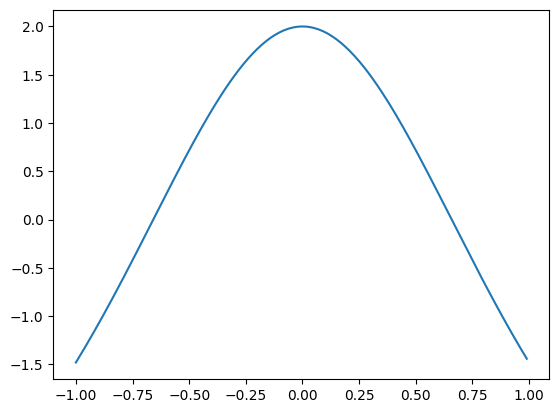

In [2]:
### Primeiro vamo encotrar o ponto de retorn E = V
xx = np.arange(-100,100)/100
plt.plot(xx,F(xx,-1))
plt.show()


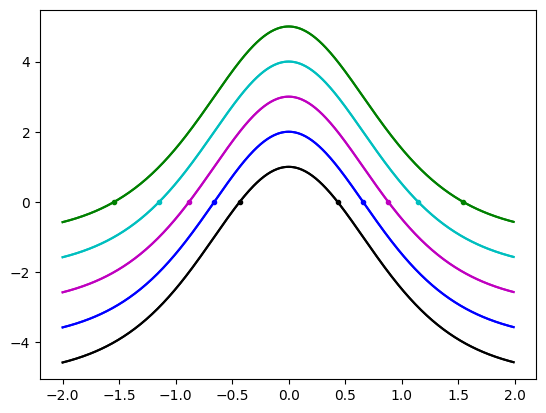

[-0.4335212707519531, -0.6584930419921875, -0.8813858032226562, -1.1462211608886719, -1.54449462890625, 0.4335212707519531, 0.6584930419921875, 0.8813858032226562, 1.1462211608886719, 1.54449462890625]


In [3]:
xx = np.arange(-200,200)/100
color = ["r","k","b","m","c","g"]
contador =0
turning_point = []
for i in range(-2,3): 
    E  = i   # Energy
    xi = 0   # X initial 
    h  = 10
    while(h>0.00001):
        x  = xi;        f  = F(x,E)
        x  = xi - h;    ff = F(x,E)
        
        if(f*ff<0):
            h = h/2
        else:
            xi= x  
    contador +=1
    turning_point.append(x)
    plt.plot(xx, F(xx,E),f"{color[contador]}")
    plt.plot(x , F(x,E) ,f"{color[contador]}.")
    
contador =0
for i in range(-2,3): 
    E  = i   # Energy
    xi = 0   # X initial 
    h  = 10
    while(h>0.00001):
        x  = xi;        f  = F(x,E)
        x  = xi + h;    ff = F(x,E)
        
        if(f*ff<0):
            h = h/2
        else:
            xi= x  
    contador +=1
    turning_point.append(x)
    plt.plot(xx, F(xx,E),f"{color[contador]}")
    plt.plot(x , F(x,E) ,f"{color[contador]}.")

plt.show()
print(turning_point)

TypeError: object of type 'function' has no len()

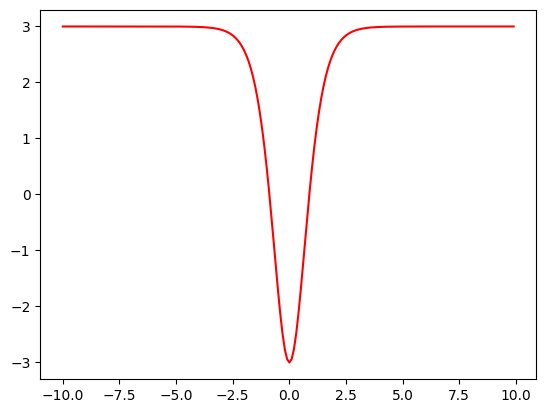

In [18]:
#plot do potencial com os pontos
xx = np.arange(-100,100)/10
plt.plot(xx, V(xx),"r")
for i in range(len(turning_point)):
    plt.plot(turning_point[i],V(turning_point[i]),"o")
plt.show()

## dPHI

Olhando o comportamento da diferenã entre a função de onda e da derivada


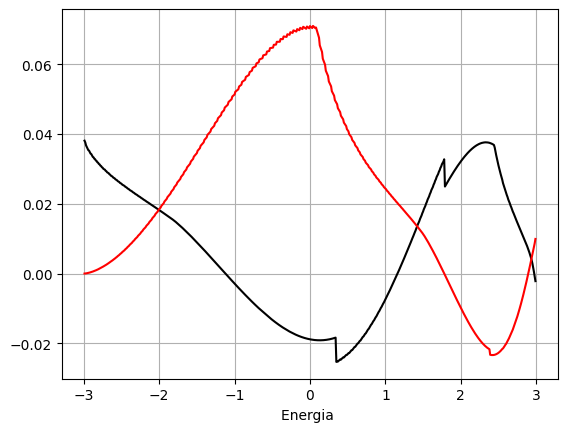

In [19]:
E = -2.99; delta = 0.01;h = 0.01; phi_0 = 0 ;phi_i = 0.1 ;phi_1 = 0 
EE    = []
D_PHI = []

while(E<2.99):

    Function_E = Psi_E(E ,h ,phi_i ,phi_0 )
    Function_D = Psi_D(E ,h ,phi_1 ,phi_i)
    
    # CONDIÇÃO PARA DERIVADA. 
    maximo =  Function_E[4]
    if maximo < Function_D[4] :
        maximo = Function_D[4]       
    
    d_PHI = ( Function_E[2] - Function_E[3]  +  Function_D[2] - Function_D[3] )/maximo
    EE.append(E)
    D_PHI.append(d_PHI)
    E = E + delta
plt.plot( EE, D_PHI,"k" )

E = -2.99; delta = 0.01;h = 0.01
EE    = []
D_PHI = []

while(E<2.99):

    Function_E = Psi_E(E ,h ,phi_i = -0.1 ,phi_0 = 0 )
    Function_D = Psi_D(E ,h ,phi_1 = 0   ,phi_i = 0.1)
    
    # CONDIÇÃO PARA DERIVADA. 
    maximo =  Function_E[4]
    if maximo < Function_D[4] :
        maximo = Function_D[4]       
    
    d_PHI = ( Function_E[2] - Function_E[3]  +  Function_D[2] - Function_D[3] )/maximo
    EE.append(E)
    D_PHI.append(d_PHI)
    E = E + delta
plt.plot( EE, D_PHI,"r" )
plt.xlabel('Energia ')
plt.grid("k")
plt.show()

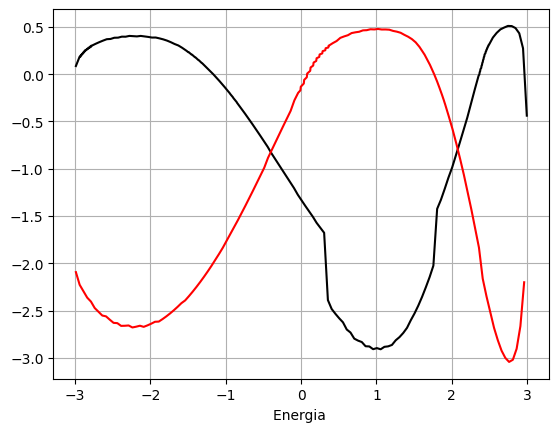

In [20]:
E = -2.99; delta = 0.05;h = 0.01; phi_0 = 0 ;phi_i = 0.1 ;phi_1 = 0 
EE    = []
D_PHI = []
bole = True
bole2 = True
while(E<2.9999):

    Function_E = Psi_E(E ,h ,phi_i ,phi_0 )
    Function_D = Psi_D(E ,h ,phi_1 ,phi_i)
    ## NORMALIZANDO A FUNÇÃO DE ONDA ##
    maximo =  Function_E[4]
    if maximo < Function_D[4] :
        maximo = Function_D[4]      
    d_PHI = (  Function_E[0][-1]  -Function_D[0][-1]  )/maximo
    
    EE.append(E)
    D_PHI.append(d_PHI) 
    E = E + delta
    
    #if ( abs(d_PHI)<0.1 )and( bole2==True ):
     #   delta = delta/10
    #    bole2 = False
    if( abs(d_PHI)<0.3 )and( bole==True ):
        delta = delta/10
        bole  = False
    elif abs(d_PHI)>=0.3 :
        delta = 0.05
        bole = True
        bole2 = True
plt.plot( EE, D_PHI,"k" )

E = -2.99; delta = 0.05;h = 0.01; 
EE    = []
D_PHI = []
bole = True
bole2 = True
while(E<2.999):

    Function_E = Psi_E(E ,h ,phi_i = -0.1 ,phi_0 = 0 )
    Function_D = Psi_D(E ,h ,phi_1 = 0  ,phi_i = 0.1)
    ## NORMALIZANDO A FUNÇÃO DE ONDA ##
    maximo =  Function_E[4]
    if maximo < Function_D[4] :
        maximo = Function_D[4]      
    d_PHI = (  Function_E[0][-1]  -Function_D[0][-1]  )/maximo
    
    EE.append(E)
    D_PHI.append(d_PHI) 
    E = E + delta
    
    if( abs(d_PHI)<0.3 )and( bole==True ):
        delta = delta/10
        bole  = False
    elif abs(d_PHI)>=0.3 :
        delta = 0.05
        bole = True
        bole2 = True
    
plt.plot( EE, D_PHI,"r" )
plt.xlabel('Energia ')
plt.grid()
plt.show()     

# procurando os niveis de energia coma derivada 

Energia =  -1.120690000000008 delta : 1e-05


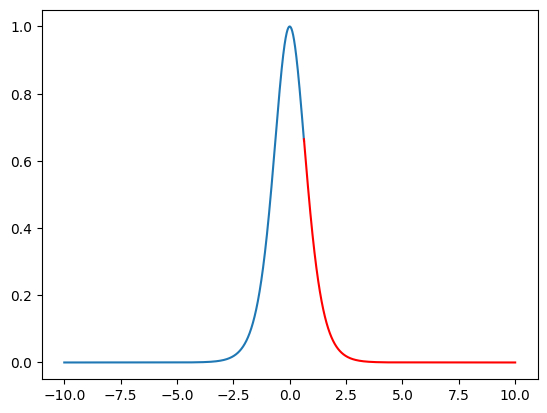

Energia =  2.974019999999975 delta : 1e-05


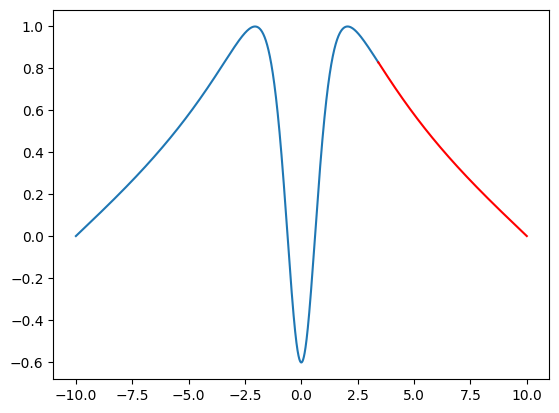

In [17]:
#############################################################################
#######                   CONDIÇÕES INICIAIS                  ###############
#############################################################################
E      = -2; 
deltai = 0.1; phi_0 = 0 ;phi_i = 0.01 ;phi_1 = 0 
bole   = True; bole2 = True
EE     = []
D_PHI  = []
N      = 0
delta  = deltai
#############################################################################
#######                        LOOP                          ################
#############################################################################
while(E<2.99):
############################################################################# 
#######               Vamos fazer uma busca direta           ################
#############################################################################
    A = step_1( E, delta, phi_0 = 0, phi_iE = 0.001,phi_iD = 0.001, phi_1 = 0)#
    E = E + delta                                                            # ADICIONANDO = UM PASSO NA ENERGIA. 
    B = step_1( E, delta, phi_0 = 0, phi_iE = 0.001,phi_iD = 0.001, phi_1 = 0)#
    if ( delta<0.0001 ):                                                     # CONDIÇÃO PARA SALVA O AUTO VALOR.
        print("Energia = ",E,"delta :",delta,)                               # PRINTE DO VALOR DA ENERGIA. 
        WAVE(E,phi_0 = 0, phi_iE = 0.01,phi_iD = 0.01, phi_1 = 0)           # PLOTE DA FUNÇÃO PARA VERIFICAR.
        N     = (5)*(N+2)                                                    # ADICIONEI ESSA VARIAVEL PARA QUE CADA VEZ QUE ENCONTRAMOS UMA ENERGIA O PASSO DIMINUISSE. 
        delta = deltai/N                                                     # FORMATA O PASSO , PARA NÃO DEMORAR TANTO.
        E = E + delta                                                        # DA UMA PASSO NA ENERGIA.
        continue                                                             # CONTINUA O LOOOP
    
    if(A[0]*B[0] < 0)and(abs(A[2])<0.1):                                     # AS CONDIÇÕES DA FUNÇÃO E DERIVADA PASSAREM PELO ZERO .
        #WAVE(E)                                                             # CASO SIM , ELE IRÁ. 
        E = E - delta                                                        # VOLTA UM PASSO DA ENERGIA.
        delta = delta/10                                                     # DIMINUIR O TAMANHO DO PASSO, PARA MELHORAR A APROXIMAÇÃO DO VALOR REAL
    
    if( abs(A[0])<0.001 )and( bole==True )and(abs(A[2])<0.1):                # AS CONDIÇÕES SERÃO SATISFEITA SE ESTIVEMOS "PROXIMO"     
        #print(abs(A[2]))                                                     # FOI COLOCADO PARA EVITAR QUE ELE PASSE DIRETO PELO ZERO 
        delta = delta/10                                                     # DIMINUIR O PASSO 
        bole  = False                                                        # NÃO SERÁ EXECUTADO NOVAMENTE ATE QUE ENCOTRE A ENERGIA 
   

A[0]*B[0]:  8.129315477871468e-15 A[2]:  -0.003024599184258538 Energia =  1.780910000000002 delta : 1e-05


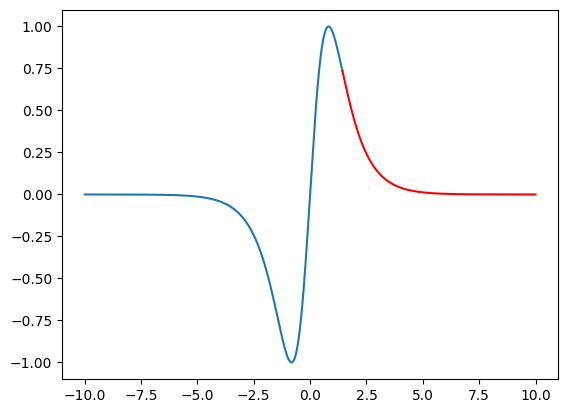

In [34]:
#############################################################################
#######                   CONDIÇÕES INICIAIS                  ###############
#############################################################################
E      = -2; 
deltai = 0.1; 
bole   = True; bole2 = True
EE     = []
D_PHI  = []
N      = 0
delta  = deltai
#############################################################################
#######                        LOOP                          ################
#############################################################################
while(E<2.5):
############################################################################# 
#######               Vamos fazer uma busca direta           ################
#############################################################################
    A = step_1( E, delta, phi_0 = 0, phi_iE = -0.01,phi_iD = 0.01, phi_1 = 0) #
    E = E + delta                                                            # ADICIONANDO = UM PASSO NA ENERGIA. 
    B = step_1( E, delta, phi_0 = 0, phi_iE = -0.01,phi_iD = 0.01, phi_1 = 0) #
    
    if ( delta<0.0001 ):                                                     # CONDIÇÃO PARA SALVA O AUTO VALOR.
        print("A[0]*B[0]: ",A[0]*B[0] ,"A[2]: ",A[2],"Energia = ",E,"delta :",delta,)
        #print("Energia = ",E,"delta :",delta,)                               # PRINTE DO VALOR DA ENERGIA. 
        WAVE(E,phi_0 = 0, phi_iE = -0.01,phi_iD = 0.01, phi_1 = 0)           # PLOTE DA FUNÇÃO PARA VERIFICAR.
        N     = (5)*(N+2)                                                    # ADICIONEI ESSA VARIAVEL PARA QUE CADA VEZ QUE ENCONTRAMOS UMA ENERGIA O PASSO DIMINUISSE. 
        delta = deltai/N                                                     # FORMATA O PASSO , PARA NÃO DEMORAR TANTO.
        E = E + delta                                                        # DA UMA PASSO NA ENERGIA.
        continue                                                             # CONTINUA O LOOOP
    
    if( abs(A[0])<0.01 )and( bole==True )and(abs(A[2])<0.1):                 # AS CONDIÇÕES SERÃO SATISFEITA SE ESTIVEMOS "PROXIMO"     
        #print(abs(A[2]))                                                    # FOI COLOCADO PARA EVITAR QUE ELE PASSE DIRETO PELO ZERO 
        delta = delta/10                                                     # DIMINUIR O PASSO 
        bole  = False                                                        # NÃO SERÁ EXECUTADO NOVAMENTE ATE QUE ENCOTRE A ENERGIA    
    
    if(A[0]*B[0] < 0)and( A[0]*B[0]< 0):                                     # AS CONDIÇÕES DA FUNÇÃO E DERIVADA PASSAREM PELO ZERO .
        #WAVE(E)                                                             # CASO SIM , ELE IRÁ. 
        E = E - delta                                                        # VOLTA UM PASSO DA ENERGIA.
        delta = delta/10                                                     # DIMINUIR O TAMANHO DO PASSO, PARA MELHORAR A APROXIMAÇÃO DO VALOR REAL
    
  

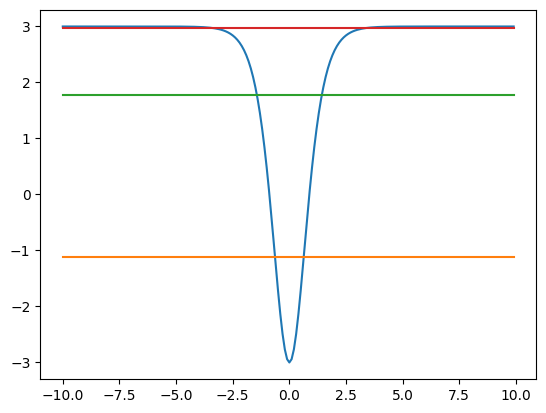

In [7]:
#plot do potencial com os pontos
xx = np.arange(-100,100)/10
Ex = np.ones(len(xx))

plt.plot(xx, V(xx))

EE = [-1.120690,1.78091 ,2.97401999]
for i in range(len(EE)):
    plt.plot(xx, (EE[i])*Ex)
plt.show()